In [ ]:
# This file contains all the code used to create the visualizations

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [20]:
# Load all of the data
all_years = pd.read_csv(r"C:\Users\Jo\Google Drive\updated_data\raw_data/hometotaldiff.csv")
teams = pd.read_csv(r"C:\Users\Jo\Google Drive\updated_data\raw_data/teams.csv")
netrating = pd.read_csv(r"C:\Users\Jo\Google Drive\updated_data\raw_data/net_rating.csv")
pace = pd.read_csv(r"C:\Users\Jo\Google Drive\updated_data\raw_data/pace.csv")



In [111]:
# Join all of the data
all_years= pd.merge(all_years, pace, how='left', left_on='team_abbreviation', right_on = 'opponent')
all_years= pd.merge(all_years, team, how='left', on='team_abbreviation')
all_years= pd.merge(all_years, netrating, how='left', on='team_abbreviation')

In [73]:
# Drop repeated column labels
all_years = all_years.drop(labels = ['team_id','team_name'], axis = 1)

In [112]:
# View our master df
all_years.head()

,team_abbreviation,homewinpct,totalwinpct,diff,winpct_rank,altitude,h_a_diff,h_o_diff,opponent,pace_difference
0,UTA,0.669,0.547,0.122,8,4226,8.277,4.144,UTA,1.485
1,DEN,0.664,0.548,0.116,7,5279,7.521,3.759,DEN,-1.856
2,IND,0.635,0.525,0.110,10,719,7.215,3.607,IND,-0.152
3,ATL,0.574,0.465,0.109,22,738,5.909,2.953,ATL,-0.026
4,POR,0.620,0.511,0.109,14,50,7.013,3.511,POR,1.428


Text(0.5, 1.0, 'Home And Overall Pace Differential by Team')

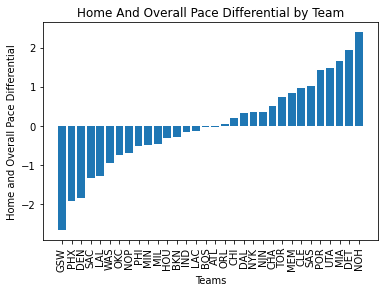

In [117]:
# This was used to create all bar graphs in the report
sort = all_years.sort_values('pace_difference',ascending = True) #sort data by variable of interest 
plt.bar(sort['team_abbreviation'], sort['pace_difference'])
plt.xticks(rotation = 'vertical')
plt.show
plt.ylabel( 'Home and Overall Pace Differential')
plt.xlabel ('Teams')
plt.title('Home And Overall Pace Differential by Team')

In [116]:
#Correlation
all_years['pace_difference'].corr(all_years['altitude'])

-0.11861933946024021

Text(0.5, 1.0, 'HWD v Altitude')

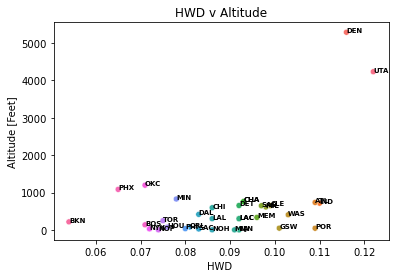

In [78]:
# This was used to create all scatter plots, easy to update based on which graph you desire
# change x and y and match the changes in X and y to changes in the text loop
# if datapoint labels are desired.
sns.scatterplot(data= all_years, y= 'altitude', x= 'diff', hue = 'team_abbreviation', legend = False )
for i in range(0, all_years.shape[0]):
     plt.text(all_years['diff'][i], all_years['altitude'][i], all_years['team_abbreviation'][i], horizontalalignment='left', fontsize='x-small', color='black', weight='semibold')
plt.ylabel( 'Altitude [Feet]')
plt.xlabel ('HWD ')
plt.title('HWD v Altitude')

In [105]:
# Used to calculate which percentile a specicfic team ranks in a specific statistic
norm.cdf(all_years[all_years['team_abbreviation'] == 'UTA']['diff'], np.mean(all_years['diff']), np.std(all_years['diff']))

array([0.98706436])